In [30]:
#                                                 Perceptron
# Perceptron is an algorithm that is used in supervised learning for binary classification,
# Perceptron is a type of single Neuron of Neural Network. But Neuron of NN is more flexible, powerful and can do complex tasks.
# Perceptron is building block of Artifical Neural Network.
# summation, Z = Inputs_i (training data) * weights_i . Z is feed to activation function to resize Z accordingly.
# Z = x1*w1 + x2*w2 + b ; b is bias. For n-d data:  Z = x1*w1 + x2*w2 + x3*w3 ............+ b
# x0 is added input which is set to 1 & corresponding weight w0 is called bias.
# 2D, perceptron finds a --> line.
# 3D, percceptron finds a --> plane.
# 4D or more perceptron finds a --> hyperplane.
# Ultimately perceptron divides whole data into 2 region.

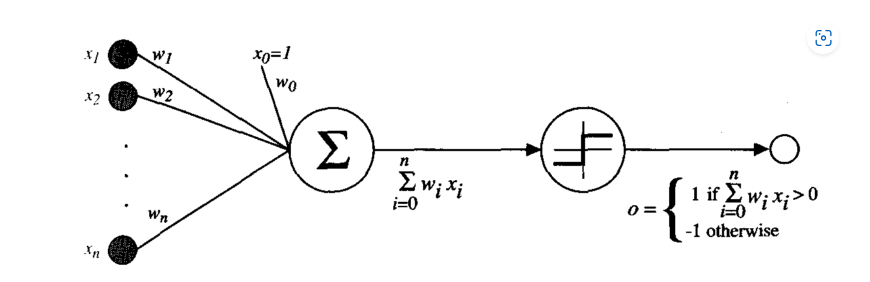

In [31]:
from IPython.display import Image
Image(filename='images/perceptron.png')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('csv files/placement.csv')
df.sample(5)
# Its a toy dataset that consists of 3 columns. cgpa and resume_score are input feature and placed (placement) is target. 

,cgpa,resume_score,placed
55,6.94,6.87,1
84,5.76,6.49,0
90,5.85,5.56,0
51,6.54,7.39,0
37,9.05,8.21,1


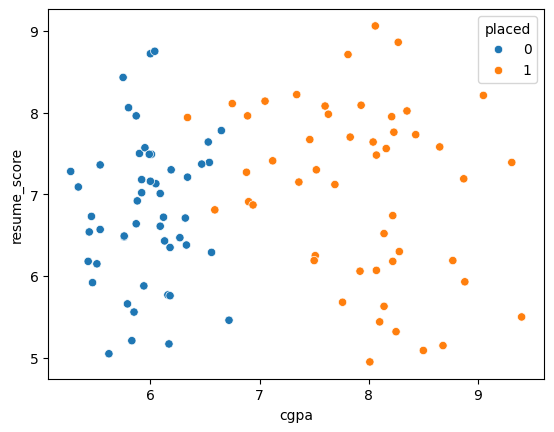

In [34]:
sns.scatterplot(x=df['cgpa'], y=df['resume_score'], hue=df['placed'])
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [35]:
# scikit-learn perceptron
from sklearn.linear_model import Perceptron
p = Perceptron()

p.fit(X,y)

print('coefficients/weights (w1 & w2):',p.coef_)
print('intercept i.e bias, b:',p.intercept_)

coefficients/weights (w1 & w2): [[ 40.26 -36.  ]]
intercept i.e bias, b: [-25.]


In [36]:
try:
    import mlxtend
    print("installed.")
except ImportError:
    print("Installing...")
    !pip install mlxtend

installed.


C:\Users\sudip\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

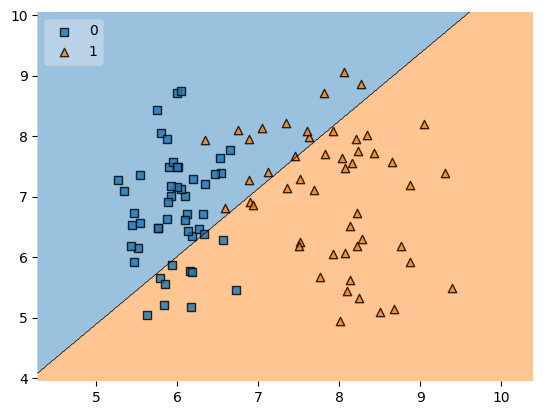

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p, legend=2)

In [38]:
#                                           Perceptron Trick

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

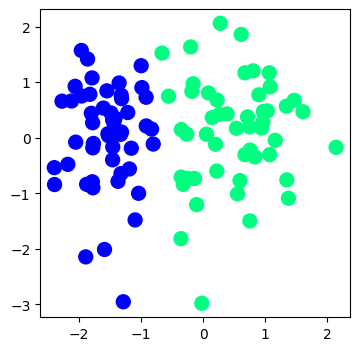

In [40]:
plt.figure(figsize=(4,4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.show()

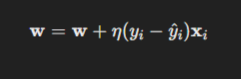

In [41]:
from IPython.display import Image
Image(filename='images/perceptron trick.png')
# weights/coefficients are updated as :

In [42]:
# step function is used . It returns either 0 or 1 . When it returns 0, y - y_hat will be 0 so no update to coefficients in that case .
def step(z):
    return 1 if z>0 else 0

In [43]:
#                                 Custom Class For Perceptron Trick 
def perceptron(X,y):
    
    X = np.insert(X, 0 ,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0],weights[1:]

# Starting with a random line. Randomly points are picked, If points are miss-classified they pull line towards them . If points are correctly
# if points are correctly classified nothing is done . i.e no update to weights and bias term.

[1.34016749 0.07341543]
1.0


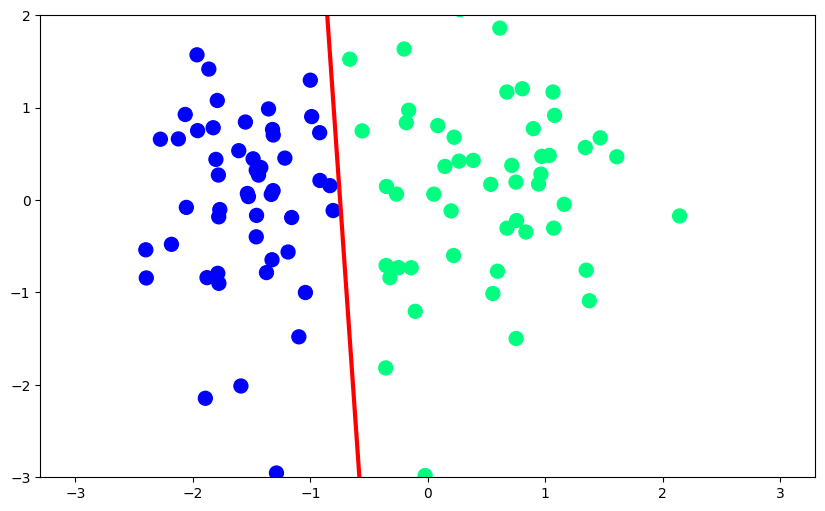

In [44]:
intercept_, coef_ = perceptron(X,y)
print(coef_)
print(intercept_) 

m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.show()

In [46]:
# perceptron trick, already did in logistic regression . Nothing different 
# But this perceptron trick don't give best/optimal solution (weights and bias i.e line). As there is no loss function .

In [1]:
# Now lets implement perceptron with loss as Hinge loss and activation function as step activation function From scratch

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

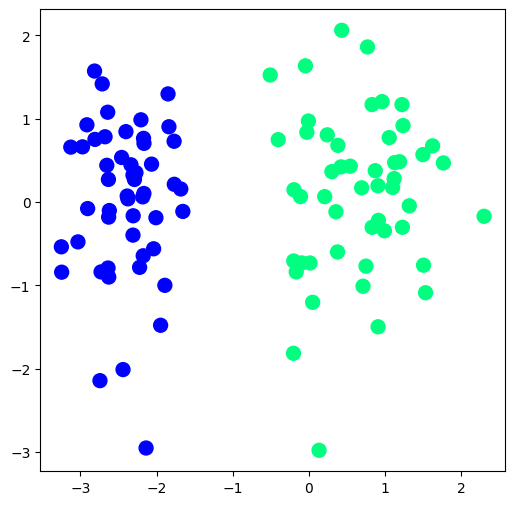

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [7]:
def perceptron(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
    
        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b

In [9]:
w1,w2,b = perceptron(X,y)
m = -(w1/w2)
c = -(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

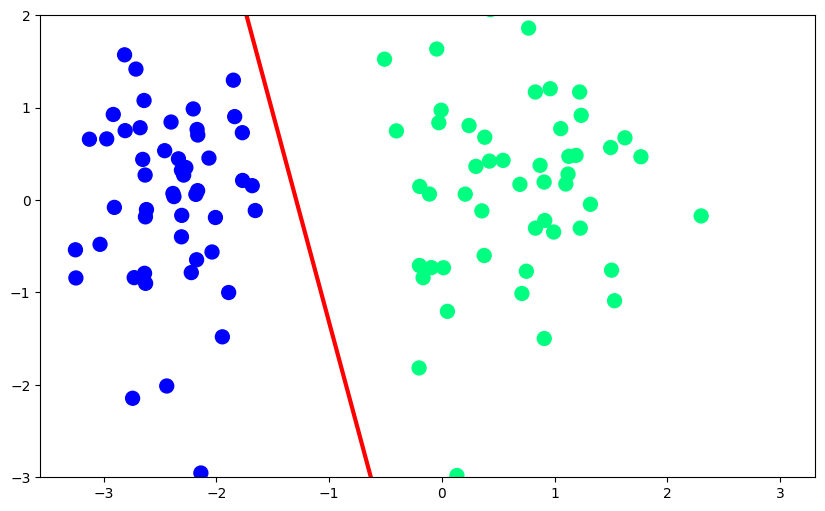

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [11]:
# perceptron is a mathematical model.Its very flexible . 
# We can use different activation function and loss function to implement Classification, regression etc.
# Hinge loss with step func --> perceptron ; binary classification 
# log loss or Binary cross Entropy with sigmoid function --> logistic regresson ; binary classifier
# categorical cross entropy as loss function with softmax function --> softmax regression ; multiclass classifier
# mean squared error with linear (no activation func) --> Linear regression 